#               **Basic plots 1: Histogram, Boxplot, Violin plot, Error bar, Ranking chart**

In this file, the first line show the year of the observation. Then, each row is the number of days in months, from days 1 to days 31, each column is a month, from January to December.

In short, we have daily value of an observation from 01 Jan 2008 to 31 Dec 2009.



### Exercise 1:

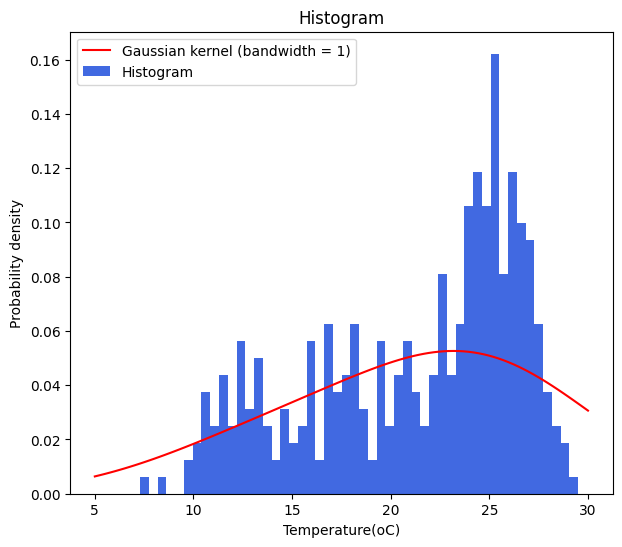

In [ ]:
file = open('Homework_sampledata1.txt', 'r')
lines = file.readlines()
file.close()
lines = lines[1:]
for i in range(len(lines)):
    lines[i] = lines[i].split()[1:]
for i in range(len(lines)):
    for j in range(len(lines[i])):
        lines[i][j] = float(lines[i][j])

import itertools
all_day_temp = list(itertools.chain.from_iterable(lines))

all_day_temp.sort()
all_day_temp_draw = all_day_temp.copy()
count = 0
for i in range(len(all_day_temp_draw)):
    if all_day_temp_draw[i] == -99:
        count += 1
all_day_temp_draw = all_day_temp_draw[count:]

# Kde kernel = gaussian and bandwidth(threshold) = 1
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt
kde = gaussian_kde(all_day_temp_draw, bw_method=1)
x = np.linspace(5, 30, 100)
plt.figure(figsize=(7,6))
plt.hist(all_day_temp_draw, bins=50, color='royalblue', density=True)
plt.plot(x, kde(x), color='red')
plt.xlabel('Temperature(oC)')
plt.ylabel('Probability density')
plt.title('Histogram')
plt.legend(['Gaussian kernel (bandwidth = 1)', 'Histogram'])
plt.show()

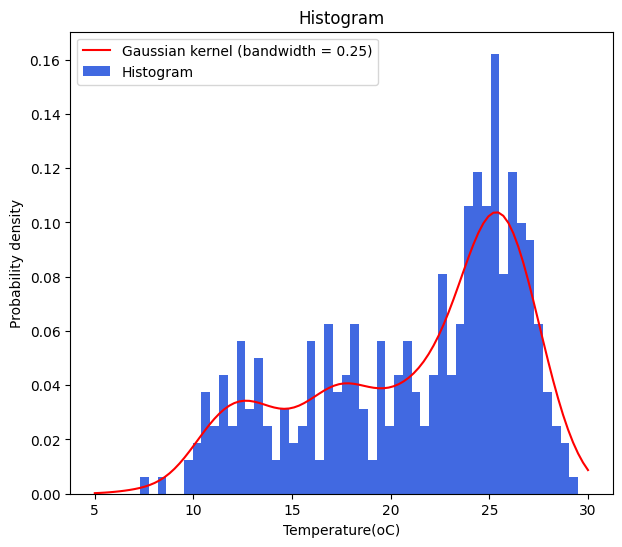

In [ ]:
kde = gaussian_kde(all_day_temp_draw, bw_method=0.25)
x = np.linspace(5, 30, 100)
plt.figure(figsize=(7,6))
plt.hist(all_day_temp_draw, bins=50, color='royalblue', density=True)
plt.plot(x, kde(x), color='red')
plt.xlabel('Temperature(oC)')
plt.ylabel('Probability density')
plt.title('Histogram')
plt.legend(['Gaussian kernel (bandwidth = 0.25)', 'Histogram'])
plt.show()

### Exercise 2:

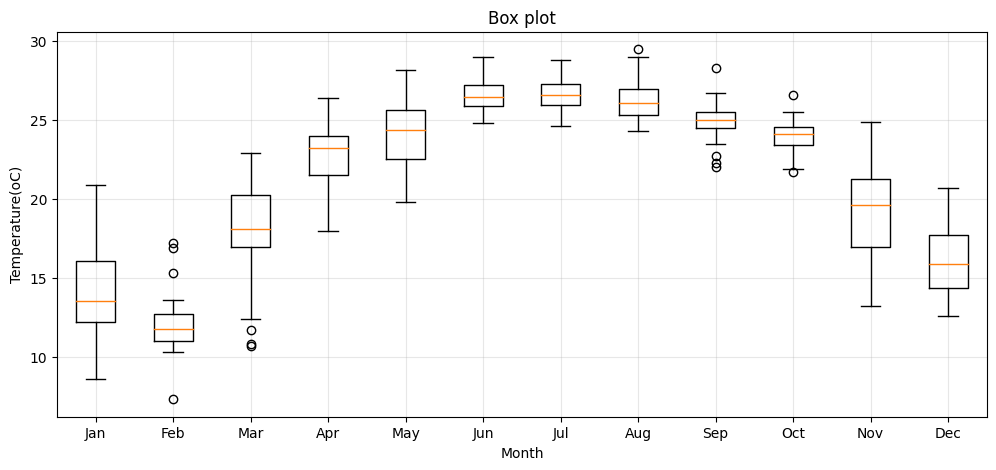

In [ ]:
all_day_temp_box = lines.copy()
all_day_temp_box = list(map(list, zip(*all_day_temp_box)))

for i in range(len(all_day_temp_box)):
    all_day_temp_box[i] = [x for x in all_day_temp_box[i] if x != -99]


plt.figure(figsize=(12,5))
plt.boxplot(all_day_temp_box)

plt.grid(True, alpha=0.3)
plt.xlabel('Month')
plt.ylabel('Temperature(oC)')
plt.xticks(np.arange(1, 13), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov','Dec'))
plt.title('Box plot')
plt.show()

### Exercise 3:

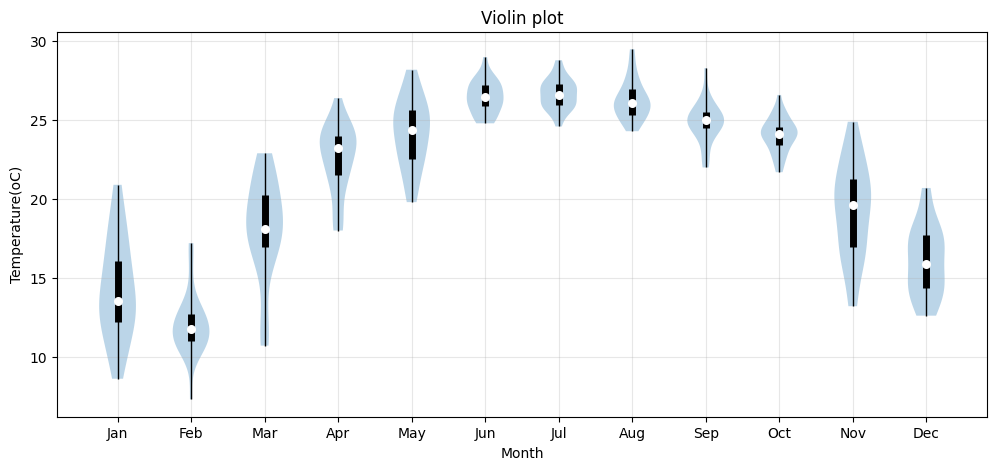

In [ ]:
plt.figure(figsize=(12,5))
plt.violinplot(all_day_temp_box, showmeans=False, showmedians=False, showextrema=False)
plt.grid(True, alpha=0.3)

for i in range(len(all_day_temp_box)):
    # interquartile box
    plt.vlines(i+1, np.percentile(all_day_temp_box[i], 25), np.percentile(all_day_temp_box[i], 75), color='k', linewidth=5, linestyle='-')
    # tail
    plt.vlines(i+1, np.min(all_day_temp_box[i]), np.max(all_day_temp_box[i]), color='k', linewidth=1, linestyle='-')
    # median
    plt.scatter(i+1, np.percentile(all_day_temp_box[i], 50), marker='o', color='white', s=30, zorder=3)

plt.xlabel('Month')
plt.ylabel('Temperature(oC)')
plt.xticks(np.arange(1, 13), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov','Dec'))
plt.title('Violin plot')
plt.show()

### Exercise 4:
Plot the monthly mean temperature and the error bar. The error bar is defined as +-1 standard deviation from the mean value.

<ipython-input-7-8c6082350717>:7: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(10, 30, 2.5)


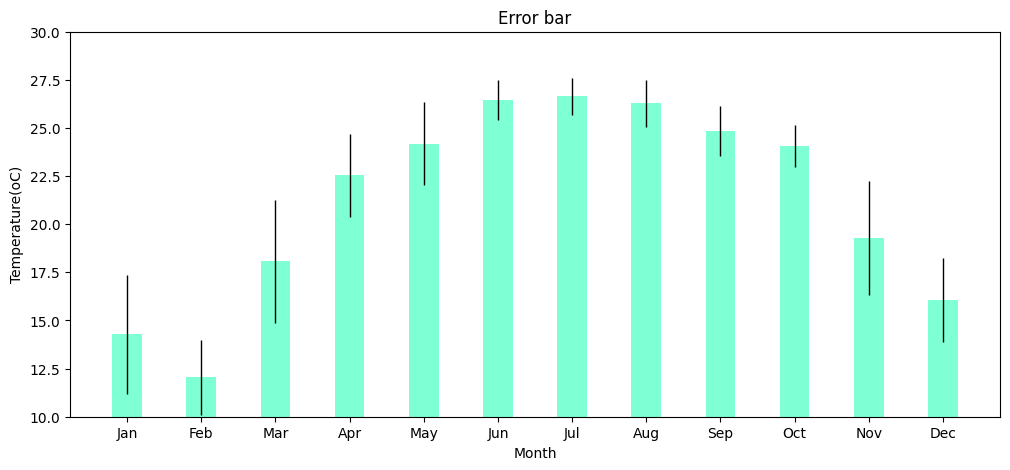

In [ ]:
plt.figure(figsize=(12,5))

for i in range(len(all_day_temp_box)):
    plt.bar(i+1, np.mean(all_day_temp_box[i]), width = 0.4, color='aquamarine')
    plt.vlines(i+1, np.mean(all_day_temp_box[i]) - np.std(all_day_temp_box[i]), np.mean(all_day_temp_box[i]) + np.std(all_day_temp_box[i]) , color='black', linestyle='-', lw=1)

plt.ylim(10, 30, 2.5)
plt.xlabel('Month')
plt.ylabel('Temperature(oC)')
plt.xticks(np.arange(1, 13), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov','Dec'))
plt.title('Error bar')
plt.show()

### Exercise 5:
Let's imagine that we have 45 students. In the final exam, we have math and literature score.

The math score is equal to mid_term * 40% + final * 60%. Same for the literature score.

The final score is the average of the literature score and math score.

Now, we want to plot the score of each student. However, we want to see the score descending (meaning that the student with highest score will stay on top).

Also, we would like to know more about the top 10 students. Therefore, for the first 3 highest overal rank students, highlight the math and literature score with 1,2, and 3. From 4-10, highlight the component score with a star (*). The student ID is displayed in the left hand of the score bar. The use of panda library is prohibited.

Input file (each file has 2 columns, the first column is the midterm score, the second column is the final score): 
Literature score & Math score

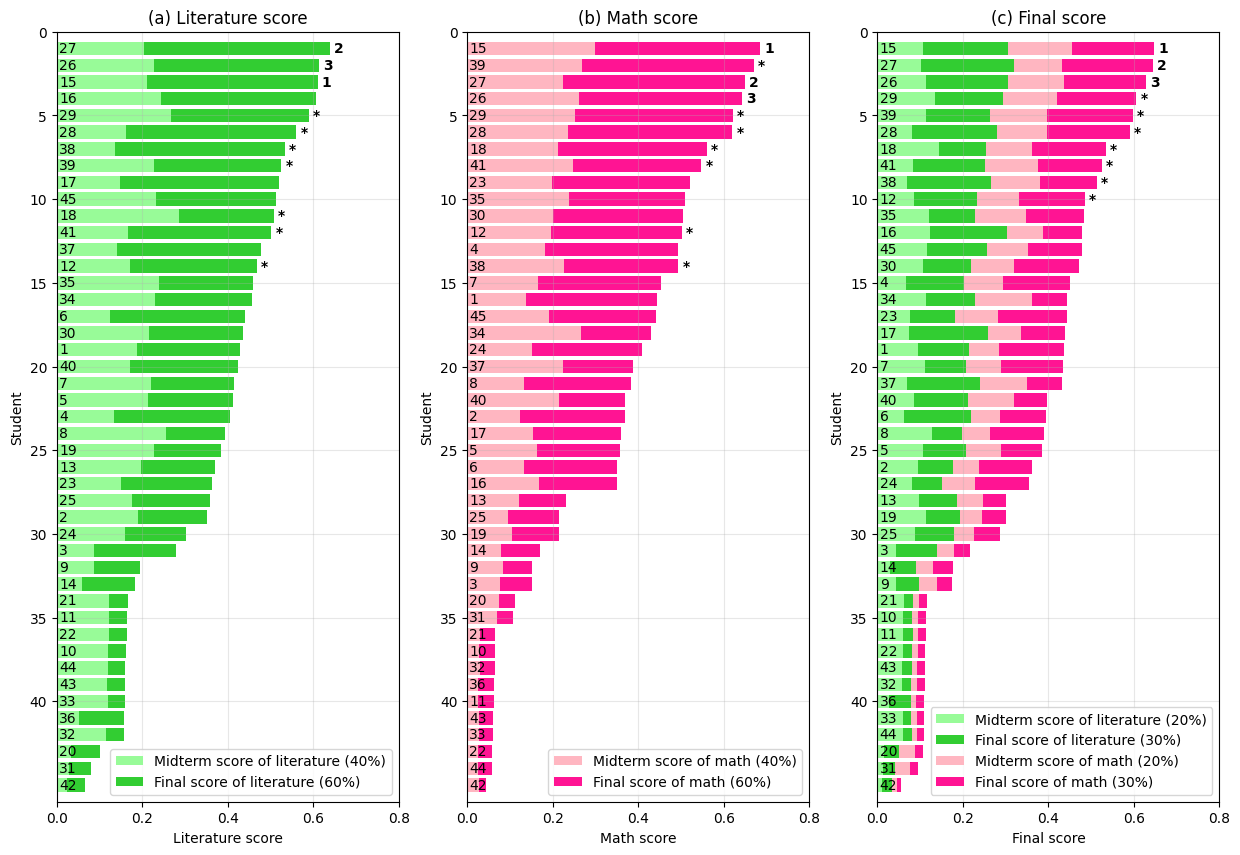

In [ ]:
lit_file = open('HW2_literature_score.txt', 'r')
lit_lines = lit_file.readlines()
lit_file.close()

for i in range(len(lit_lines)):
    lit_lines[i] = lit_lines[i].split()

for i in range(len(lit_lines)):
    for j in range(len(lit_lines[i])):
        lit_lines[i][j] = float(lit_lines[i][j])

math_file = open('HW2_math_score.txt', 'r')
math_lines = math_file.readlines()
math_file.close()

for i in range(len(math_lines)):
    math_lines[i] = math_lines[i].split()

for i in range(len(math_lines)):
    for j in range(len(math_lines[i])):
        math_lines[i][j] = float(math_lines[i][j])


lit_rank = []
for i in range(len(lit_lines)):
    lit_rank.append([lit_lines[i][0]*0.4 + lit_lines[i][1]*0.6, i+1])


lit_rank.sort(reverse=True)

math_rank = []
for i in range(len(math_lines)):
    math_rank.append([math_lines[i][0]*0.4 + math_lines[i][1]*0.6, i+1])

math_rank.sort(reverse=True)

final_rank = []
for i in range(len(lit_lines)):
    final_rank.append([((lit_lines[i][0] + math_lines[i][0])/2)*0.4 + ((lit_lines[i][1] + math_lines[i][1])/2)*0.6, i+1])
final_rank.sort(reverse=True)

final_rank_cf = final_rank.copy()
final_rank_cf.sort(reverse=True)

final_rank_cf = final_rank_cf[:10]
for i in range(len(final_rank_cf)):
    if i <= 2:
        final_rank_cf[i][0] = i + 1
    else:
        final_rank_cf[i][0] = '*'


fig, axs = plt.subplots(1, 3, figsize=(15, 10))
for i in range(3):
    axs[i].grid(True, alpha=0.3)

axs[0].set_title('(a) Literature score')
axs[0].invert_yaxis()
axs[0].set_xlabel('Literature score')
axs[0].set_ylabel('Student')
axs[0].set_xticks(np.arange(0, 0.81, 0.2))
axs[0].set_yticks(np.arange(0, 45, 5))
axs[0].set_xlim(0, 0.8)
axs[0].set_ylim(46, 0)


for i in range(len(lit_rank)):
    # Plot 2 color for midterm x 40% (light color) and final score x 60% (bold color) in each student store in lit_lines
    axs[0].barh(i+1, lit_lines[lit_rank[i][1]-1][0]*0.4, color='palegreen')
    axs[0].barh(i+1, lit_lines[lit_rank[i][1]-1][1]*0.6, left=lit_lines[lit_rank[i][1]-1][0]*0.4, color='limegreen')
    # Print index of student in left of bar
    axs[0].text(0.005, i+1, lit_rank[i][1], fontsize=10, va='center')
    # Print rank of student in right of bar
    for j in range(len(final_rank_cf)):
        if lit_rank[i][1] == final_rank_cf[j][1]:
            axs[0].text(lit_lines[lit_rank[i][1]-1][0]*0.4 + lit_lines[lit_rank[i][1]-1][1]*0.6 + 0.01, i+1, final_rank_cf[j][0], fontsize=10, weight='bold', va='center')

axs[1].set_title('(b) Math score')
axs[1].invert_yaxis()
axs[1].set_xlabel('Math score')
axs[1].set_ylabel('Student')
axs[1].set_xticks(np.arange(0, 0.81, 0.2))
axs[1].set_yticks(np.arange(0, 45, 5))
axs[1].set_xlim(0, 0.8)
axs[1].set_ylim(46, 0)

for i in range(len(math_rank)):
    # Plot 2 color for midterm x 40% (light color) and final score x 60% (bold color) in each student store in lit_lines
    axs[1].barh(i+1, math_lines[math_rank[i][1]-1][0]*0.4, color='lightpink')
    axs[1].barh(i+1, math_lines[math_rank[i][1]-1][1]*0.6, left=math_lines[math_rank[i][1]-1][0]*0.4, color='deeppink')
    # Print index of student in left of bar
    axs[1].text(0.005, i+1, math_rank[i][1], fontsize=10, va='center')
    # Print rank of student in right of bar
    for j in range(len(final_rank_cf)):
        if math_rank[i][1] == final_rank_cf[j][1]:
            axs[1].text(math_lines[math_rank[i][1]-1][0]*0.4 + math_lines[math_rank[i][1]-1][1]*0.6 + 0.01, i+1, final_rank_cf[j][0], fontsize=10, weight='bold', va='center')

axs[2].set_title('(c) Final score')
axs[2].invert_yaxis()
axs[2].set_xlabel('Final score')
axs[2].set_ylabel('Student')
axs[2].set_xticks(np.arange(0, 0.81, 0.2))
axs[2].set_yticks(np.arange(0, 45, 5))
axs[2].set_xlim(0, 0.8)
axs[2].set_ylim(46, 0)

for i in range(len(final_rank)):
    # Plot 4 colors for avg lit score (mid x 40% and final x 60%) and avg math score (mid x 40% and final x 60%) in each student store in lit_lines
    axs[2].barh(i+1, lit_lines[final_rank[i][1]-1][0]*0.2, color='palegreen')
    axs[2].barh(i+1, lit_lines[final_rank[i][1]-1][1]*0.3, left=lit_lines[final_rank[i][1]-1][0]*0.2, color='limegreen')
    axs[2].barh(i+1, math_lines[final_rank[i][1]-1][0]*0.2, left=lit_lines[final_rank[i][1]-1][0]*0.2 + lit_lines[final_rank[i][1]-1][1]*0.3, color='lightpink')
    axs[2].barh(i+1, math_lines[final_rank[i][1]-1][1]*0.3, left=lit_lines[final_rank[i][1]-1][0]*0.2 + lit_lines[final_rank[i][1]-1][1]*0.3 + math_lines[final_rank[i][1]-1][0]*0.2, color='deeppink')
    # Print index of student in left of bar
    axs[2].text(0.005, i+1, final_rank[i][1], fontsize=10, va='center')
    # Print rank of student in right of bar
    for j in range(len(final_rank_cf)):
        if final_rank[i][1] == final_rank_cf[j][1]:
            axs[2].text(lit_lines[final_rank[i][1]-1][0]*0.2 + lit_lines[final_rank[i][1]-1][1]*0.3 + math_lines[final_rank[i][1]-1][0]*0.2 + math_lines[final_rank[i][1]-1][1]*0.3 + 0.01, i+1, final_rank_cf[j][0], fontsize=10, weight='bold', va='center')

# Draw legend
axs[0].legend(['Midterm score of literature (40%)', 'Final score of literature (60%)'])
axs[1].legend(['Midterm score of math (40%)', 'Final score of math (60%)'])
axs[2].legend(['Midterm score of literature (20%)', 'Final score of literature (30%)', 'Midterm score of math (20%)', 'Final score of math (30%)'])

plt.show()
